In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [3]:
df = pd.read_csv("dataset/btc.csv")
df.shape
df.head()
type(df)

pandas.core.frame.DataFrame

In [90]:
df["Roc"] = df["Close"].pct_change() * 100
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Roc
1,2017-03-05,1254.290039,1267.290039,1238.060059,1267.119995,1267.119995,134127000,0.953669
2,2017-03-06,1267.469971,1276.000000,1264.599976,1272.829956,1272.829956,153656992,0.450625
3,2017-03-07,1273.209961,1275.550049,1204.800049,1223.540039,1223.540039,291256000,-3.872467
4,2017-03-08,1223.229980,1232.160034,1148.079956,1150.000000,1150.000000,332603008,-6.010432
5,2017-03-09,1150.349976,1197.459961,1141.229980,1188.489990,1188.489990,212283008,3.346956


In [91]:
df["Roc"].max()

25.24716942763181

Text(0.5, 1.0, 'Price of Bitcoin')

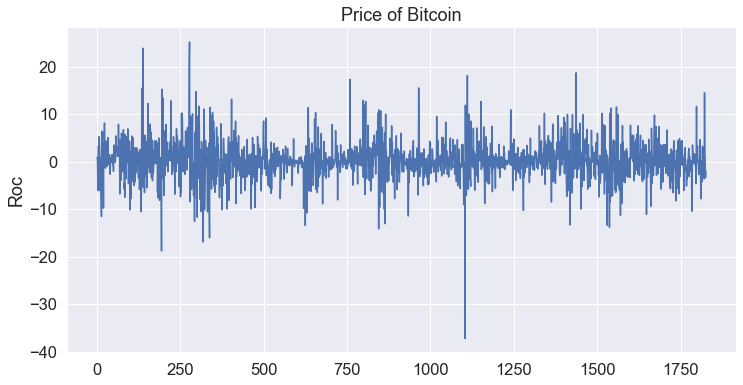

In [92]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="Roc", data=df).set_title("Price of Bitcoin")

In [93]:
data = df.iloc[:, 4]
hist = []
target = []
length = 90
for i in range(len(data)-length-30):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [94]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [95]:
hist.shape

(1706, 90)

In [96]:
target.shape

(1706, 1)

In [97]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [98]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)
print(target_scaled.shape)

(1706, 90, 1)
(1706, 1)


In [99]:
# import random
# random.shuffle(hist_scaled)

In [100]:
X_train = hist_scaled[:1600,:,:]
X_test = hist_scaled[1600:,:,:]
y_train = target_scaled[:1600,:]
y_test = target_scaled[1600:,:]

In [101]:
y_train.shape

(1600, 1)

In [102]:
X_train.shape

(1600, 90, 1)

In [103]:
import tensorflow as tf
from tensorflow.keras import layers

In [104]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 90, 32)            4352      
_________________________________________________________________
lstm_10 (LSTM)               (None, 90, 32)            8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [106]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
25/25 [==============================] - 2s 61ms/step - loss: 0.0265
Epoch 2/5
25/25 [==============================] - 1s 56ms/step - loss: 0.0034
Epoch 3/5
25/25 [==============================] - 1s 59ms/step - loss: 0.0027
Epoch 4/5
25/25 [==============================] - 1s 59ms/step - loss: 0.0024
Epoch 5/5
25/25 [==============================] - 1s 59ms/step - loss: 0.0028


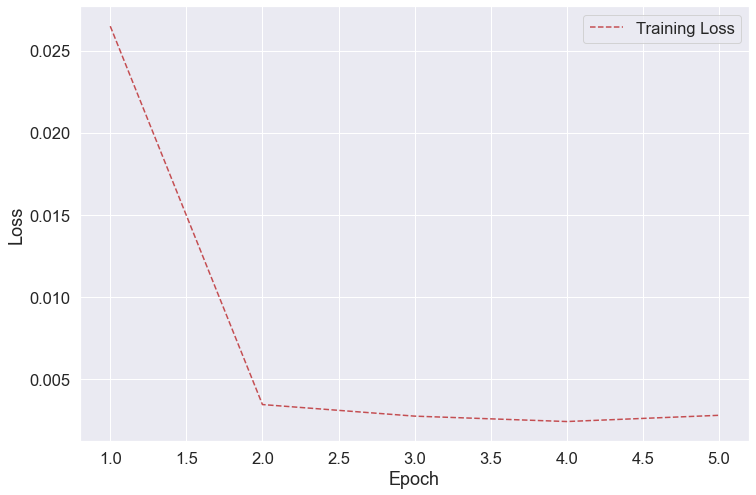

In [107]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

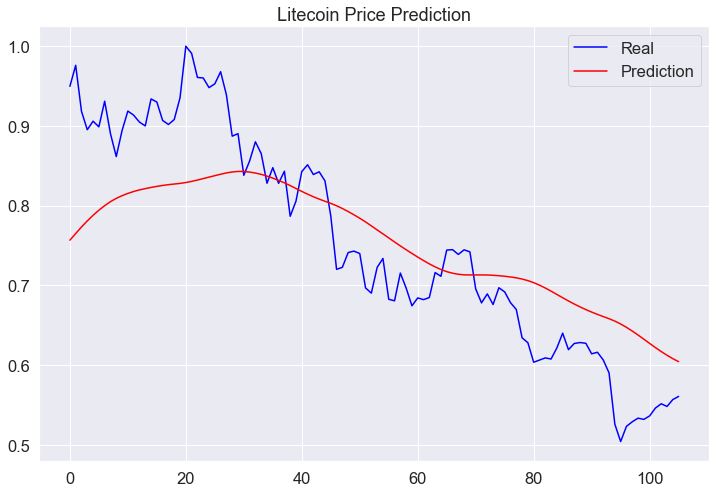

In [108]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

In [109]:
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

In [110]:
pred_transformed[0]

array([51599.71], dtype=float32)

In [111]:
y_test_transformed[0]

array([64261.9921875])

In [112]:
diff = pred_transformed / y_test_transformed

In [113]:
diff_percentage = abs(1 - diff)

In [114]:
diff_percentage.sum() / len(diff_percentage)

0.08747946037043824

In [115]:
y_test_transformed[-5:-1]

array([[37784.33203125],
       [38138.1796875 ],
       [37917.6015625 ],
       [38483.125     ]])

In [116]:
pred_transformed[-5:-1]

array([[42763.113],
       [42436.418],
       [42130.36 ],
       [41851.39 ]], dtype=float32)

In [117]:
diff_percentage[-5:-1]

array([[0.13176841],
       [0.11270172],
       [0.11110296],
       [0.08752578]])

In [118]:
percantage_pred = []
for i in range(len(pred_transformed)-1):
    percantage_pred.append(pred_transformed[i+1] / pred_transformed[i])
percantage_pred

[array([1.0106621], dtype=float32),
 array([1.0102664], dtype=float32),
 array([1.0095336], dtype=float32),
 array([1.0086966], dtype=float32),
 array([1.0077543], dtype=float32),
 array([1.0069765], dtype=float32),
 array([1.0060278], dtype=float32),
 array([1.0049313], dtype=float32),
 array([1.0040327], dtype=float32),
 array([1.0033816], dtype=float32),
 array([1.0028406], dtype=float32),
 array([1.0023557], dtype=float32),
 array([1.0019115], dtype=float32),
 array([1.001711], dtype=float32),
 array([1.0015793], dtype=float32),
 array([1.0013725], dtype=float32),
 array([1.0011382], dtype=float32),
 array([1.0009369], dtype=float32),
 array([1.0009058], dtype=float32),
 array([1.0012747], dtype=float32),
 array([1.0016904], dtype=float32),
 array([1.0019486], dtype=float32),
 array([1.0021182], dtype=float32),
 array([1.0021377], dtype=float32),
 array([1.0020952], dtype=float32),
 array([1.0020759], dtype=float32),
 array([1.0018831], dtype=float32),
 array([1.0013692], dtype=flo

In [119]:
aylik_tahmin = pred_transformed[-1] / pred_transformed[0]
aylik_tahmin

array([0.806282], dtype=float32)

In [120]:
aylik_return = y_test_transformed[-1] / y_test_transformed[0]
aylik_return

array([0.60289562])

In [141]:
buy = 0
sell = 0
purchases = {}
for i in range(0, len(y_test_transformed)-1):
    # print(pred_transformed[i], pred_transformed[i+1])
    if y_test_transformed[i] < y_test_transformed[i+1]:
        buy += 1
        purchases[i] = ([y_test_transformed[i], y_test_transformed[i+1], i])
    else:
        sell += 1
print(purchases)

{0: [array([64261.9921875]), array([65992.8359375]), 0], 3: [array([60692.265625]), array([61393.6171875]), 3], 5: [array([60930.8359375]), array([63039.82421875]), 5], 8: [array([58482.38671875]), array([60622.13671875]), 8], 9: [array([60622.13671875]), array([62227.96484375]), 9], 13: [array([61004.40625]), array([63226.40234375]), 13], 17: [array([61125.67578125]), array([61527.48046875]), 17], 18: [array([61527.48046875]), array([63326.98828125]), 18], 19: [array([63326.98828125]), array([67566.828125]), 19], 24: [array([64155.94140625]), array([64469.52734375]), 24], 25: [array([64469.52734375]), array([65466.83984375]), 25], 28: [array([60161.24609375]), array([60368.01171875]), 28], 30: [array([56942.13671875]), array([58119.578125]), 30], 31: [array([58119.578125]), array([59697.1953125]), 31], 34: [array([56289.2890625]), array([57569.07421875]), 34], 36: [array([56280.42578125]), array([57274.6796875]), 36], 38: [array([53569.765625]), array([54815.078125]), 38], 39: [array(

In [142]:
buy = 0
sell = 0
sum = 100
for i in range(0, len(y_test_transformed)-1):
    if i in purchases:
        # print(i, y_test_transformed[i], y_test_transformed[i+1])
        print(i, y_test_transformed[i+1] / y_test_transformed[i])
        sum *= y_test_transformed[i+1] / y_test_transformed[i]
print(sum)

0 [1.02693418]
3 [1.01155586]
5 [1.03461282]
8 [1.03658794]
9 [1.02648914]
13 [1.03642353]
17 [1.00657342]
18 [1.02924722]
19 [1.06695155]
24 [1.00488787]
25 [1.01546952]
28 [1.00343686]
30 [1.02067786]
31 [1.02714433]
34 [1.02273586]
36 [1.01766607]
38 [1.02324655]
39 [1.04439251]
40 [1.0097489]
42 [1.00393651]
46 [1.00341752]
47 [1.0245859]
48 [1.00232216]
52 [1.04485722]
53 [1.01490662]
56 [1.04900152]
59 [1.01399573]
61 [1.00370954]
62 [1.04386356]
64 [1.04433669]
65 [1.00074149]
67 [1.0075284]
71 [1.01579112]
73 [1.0298094]
80 [1.00423599]
81 [1.00425697]
83 [1.02186911]
84 [1.02838942]
86 [1.01193027]
87 [1.00180278]
90 [1.00296048]
95 [1.03558509]
96 [1.01040674]
97 [1.00817573]
99 [1.00776382]
100 [1.0173971]
101 [1.00936493]
103 [1.01491454]
104 [1.00676007]
[255.70070658]
